### Using our VQ-VAE!

Instead of downloading; loading our own VAE-model!

In [1]:
from diffusers import AutoencoderKL
import torch

In [2]:
# downloaded tensors
# testing on batch
import time
from get_vae import get_vae

device= 'cuda'
t = torch.randn([1,3,256,256],device=device)

# trying to seperate encoder and decoder
vae,encoder = get_vae()

torch.Size([1, 3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.06898105..1.0290631].


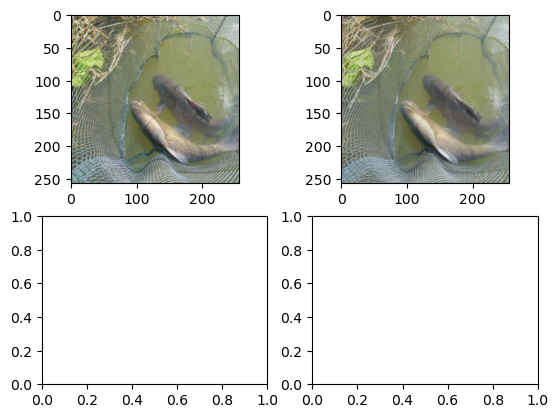

In [4]:
import matplotlib.pyplot as plt
import torchvision
transform = torchvision.transforms.Compose([torchvision.transforms.Resize([256,256]),torchvision.transforms.ToTensor()])
dataset= torchvision.datasets.Imagenette(root='../data/imagenette_download',split="train",download=False,transform=transform)
fig,ax = plt.subplots(2,2)

with torch.no_grad():
    ax[0][0].imshow(dataset[0][0].permute(1,2,0))
    ax[0][1].imshow(vae.decode(encoder(dataset[0][0].unsqueeze(0))).squeeze().permute(1,2,0))
